In [90]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

### Abrindo os datasets

In [91]:
# EDA para os dados de input (meta-dados)

# abrir os arquivos csv
experiment_ids = [0, 1, 2, 3, 4]
dataframes = [[] for _ in range(len(experiment_ids))]

for i, exp_id in enumerate(experiment_ids):
    file_path = f"./input_data/experiment_{exp_id}/"
    for file_name in os.listdir(file_path):
        if file_name.endswith(".csv"):
            print(f"Lendo arquivo: {file_name} do experimento {exp_id}")
            df = pd.read_csv(os.path.join(file_path, file_name))
            dataframes[i].append(df)

Lendo arquivo: best_accuracy_sample_0.csv do experimento 0
Lendo arquivo: best_ansatz_sample_0.csv do experimento 0
Lendo arquivo: best_embedding_sample_0.csv do experimento 0
Lendo arquivo: best_optimizer_sample_0.csv do experimento 0
Lendo arquivo: unsupervised_metric_sample_0.csv do experimento 0
Lendo arquivo: best_accuracy_sample_1.csv do experimento 1
Lendo arquivo: best_ansatz_sample_1.csv do experimento 1
Lendo arquivo: best_embedding_sample_1.csv do experimento 1
Lendo arquivo: best_optimizer_sample_1.csv do experimento 1
Lendo arquivo: unsupervised_metric_sample_1.csv do experimento 1
Lendo arquivo: best_accuracy_sample_2.csv do experimento 2
Lendo arquivo: best_ansatz_sample_2.csv do experimento 2
Lendo arquivo: best_embedding_sample_2.csv do experimento 2
Lendo arquivo: best_optimizer_sample_2.csv do experimento 2
Lendo arquivo: unsupervised_metric_sample_2.csv do experimento 2
Lendo arquivo: best_accuracy_sample_3.csv do experimento 3
Lendo arquivo: best_ansatz_sample_3.cs

In [92]:
# Carregar mappings
base_path = './input_data/'
with open(os.path.join(base_path, 'embedding_mapping.pkl'), 'rb') as f:
    embedding_mapping = pickle.load(f)
embedding_labels = [k for k, v in sorted(embedding_mapping.items(), key=lambda x: x[1])]

with open(os.path.join(base_path, 'unsupervised_mapping.pkl'), 'rb') as f:
    unsup_mapping = pickle.load(f)
unsup_labels = [k for k, v in sorted(unsup_mapping.items(), key=lambda x: x[1])]

with open(os.path.join(base_path, 'ansatz_mapping.pkl'), 'rb') as f:
    ansatz_mapping = pickle.load(f)
ansatz_labels = [k for k, v in sorted(ansatz_mapping.items(), key=lambda x: x[1])]

with open(os.path.join(base_path, 'optimizer_mapping.pkl'), 'rb') as f:
    optimizer_mapping = pickle.load(f)
optimizer_labels = [k for k, v in sorted(optimizer_mapping.items(), key=lambda x: x[1])]

In [93]:
dataframes[0][1].head()

,f1,f1v,f2,f3,f4,l1,l2,l3,n1,n2,...,lsc,density,clsCoef,hubs,t2,t3,t4,c1,c2,target
0,0.090627,0.041849,0.000775,0.004762,0.000000,0.012291,0.011905,0.002381,0.009524,0.254106,...,0.588367,0.794203,0.298096,0.685763,0.028571,0.028571,1.0,0.0,0.0,5
1,0.997411,0.991645,0.844027,0.900000,0.871429,0.313968,0.442857,0.471429,0.021429,0.439120,...,0.749796,0.780124,0.064621,0.759976,0.028571,0.028571,1.0,0.0,0.0,0
2,0.997829,0.995600,0.831284,0.992857,0.988571,0.326069,0.475714,0.494286,0.023571,0.471945,...,0.908316,0.866479,0.240285,0.826807,0.002857,0.002857,1.0,0.0,0.0,35
3,0.977122,0.951001,0.621910,0.885714,0.814286,0.301236,0.414286,0.528571,0.050000,0.464071,...,0.840204,0.877019,0.286267,0.804098,0.028571,0.028571,1.0,0.0,0.0,2
4,0.999794,0.999546,0.886513,0.992857,0.990000,0.330893,0.492857,0.470000,0.002143,0.441636,...,0.750314,0.765138,0.041339,0.755928,0.002857,0.002857,1.0,0.0,0.0,0


### Funções de plot

In [94]:
def plot_max_accuracy_distribution(dataframes, experiment_ids):
    # distribuição da acurácia máxima alcançada por experimento e overall
    overall_accuracies = []
    for i in range(len(experiment_ids)):
        df = dataframes[i][0]
        accuracies = df['target'].values
        overall_accuracies.extend(df['target'].values)

        plt.figure(figsize=(8, 5))
        plt.hist(accuracies, bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribuição da Acurácia Máxima - Experimento {experiment_ids[i]}')
        plt.xlabel('Acurácia Máxima')
        plt.ylabel('Frequência')
        plt.grid(axis='y', alpha=0.75)

    plt.figure(figsize=(8, 5))
    plt.hist(overall_accuracies, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribuição da Acurácia Geral - Experimento {experiment_ids[i]}')
    plt.xlabel('Acurácia Geral')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [95]:
def plot_best_ansatz_distribution(dataframes, experiment_ids, ansatz_labels):
    overall_ansatz = []

    for i, exp_id in enumerate(experiment_ids):
        df = dataframes[i][1]
        ansatz = df['target'].values
        overall_ansatz.extend(ansatz)

        # contagem de frequência por índice numérico
        counts = pd.Series(ansatz).value_counts().reindex(np.arange(len(ansatz_labels)), fill_value=0)

        plt.figure(figsize=(18, 6))
        plt.bar(ansatz_labels, counts.values, color='salmon', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title(f'Distribuição do Melhor Ansatz - Experimento {exp_id}')
        plt.xlabel('Ansatz')
        plt.ylabel('Frequência (contagem)')
        plt.grid(axis='y', alpha=0.3)

    # Distribuição geral
    overall_counts = pd.Series(overall_ansatz).value_counts().reindex(np.arange(len(ansatz_labels)), fill_value=0)

    plt.figure(figsize=(18, 6))
    plt.bar(ansatz_labels, overall_counts.values, color='orange', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title('Distribuição do Melhor Ansatz Geral')
    plt.xlabel('Ansatz')
    plt.ylabel('Frequência (contagem)')
    plt.grid(axis='y', alpha=0.3)

    plt.show()

In [ ]:
def plot_best_embedding_distribution(dataframes, experiment_ids, embedding_labels):
    overall_embedding = []

    for i, exp_id in enumerate(experiment_ids):
        df = dataframes[i][2]
        embedding = df['target'].values
        overall_embedding.extend(embedding)

        # Contagem absoluta alinhada com labels
        counts = pd.Series(embedding).value_counts().reindex(np.arange(len(embedding_labels)), fill_value=0)

        plt.figure(figsize=(18, 6))
        plt.bar(embedding_labels, counts.values, color='lightblue', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title(f'Distribuição do Melhor Embedding - Experimento {exp_id}')
        plt.xlabel('Embedding')
        plt.ylabel('Frequência (contagem)')
        plt.grid(axis='y', alpha=0.3)

    overall_counts = pd.Series(overall_embedding).value_counts().reindex(np.arange(len(embedding_labels)), fill_value=0)

    plt.figure(figsize=(18, 6))
    plt.bar(embedding_labels, overall_counts.values, color='blue', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title('Distribuição do Melhor Embedding Geral')
    plt.xlabel('Embedding')
    plt.ylabel('Frequência (contagem)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [ ]:
def plot_best_optimizer_distribution(dataframes, experiment_ids, optimizer_labels):
    overall_optimizer = []

    for i, exp_id in enumerate(experiment_ids):
        df = dataframes[i][3]
        optimizer = df['target'].values
        overall_optimizer.extend(optimizer)

        counts = pd.Series(optimizer).value_counts().reindex(np.arange(len(optimizer_labels)), fill_value=0)

        plt.figure(figsize=(18, 6))
        plt.bar(optimizer_labels, counts.values, color='purple', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title(f'Distribuição do Melhor Otimizador - Experimento {exp_id}')
        plt.xlabel('Otimizador')
        plt.ylabel('Frequência (contagem)')
        plt.grid(axis='y', alpha=0.3)

    overall_counts = pd.Series(overall_optimizer).value_counts().reindex(np.arange(len(optimizer_labels)), fill_value=0)

    plt.figure(figsize=(18, 6))
    plt.bar(optimizer_labels, overall_counts.values, color='violet', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title('Distribuição do Melhor Otimizador Geral')
    plt.xlabel('Otimizador')
    plt.ylabel('Frequência (contagem)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [98]:
def plot_best_unsupervised_distribution(dataframes, experiment_ids, unsup_labels):
    overall_unsup = []

    for i, exp_id in enumerate(experiment_ids):
        df = dataframes[i][4]
        unsup = df['target'].values
        overall_unsup.extend(unsup)

        counts = pd.Series(unsup).value_counts().reindex(np.arange(len(unsup_labels)), fill_value=0)

        plt.figure(figsize=(18, 6))
        plt.bar(unsup_labels, counts.values, color='lightgreen', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title(f'Distribuição do Melhor Método Não Supervisionado - Experimento {exp_id}')
        plt.xlabel('Método Não Supervisionado')
        plt.ylabel('Frequência (contagem)')
        plt.grid(axis='y', alpha=0.3)

    overall_counts = pd.Series(overall_unsup).value_counts().reindex(np.arange(len(unsup_labels)), fill_value=0)

    plt.figure(figsize=(18, 6))
    plt.bar(unsup_labels, overall_counts.values, color='green', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title('Distribuição do Melhor Método Não Supervisionado Geral')
    plt.xlabel('Método Não Supervisionado')
    plt.ylabel('Frequência (contagem)')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

### plot

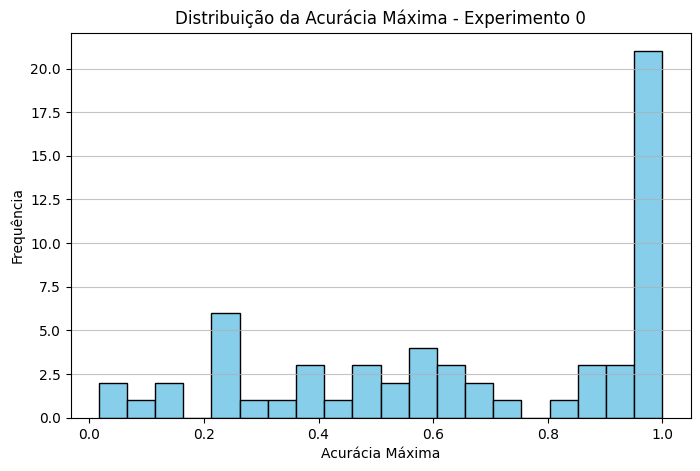

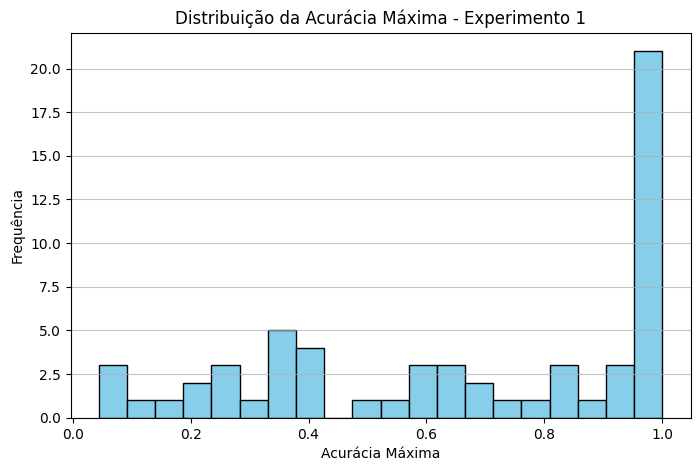

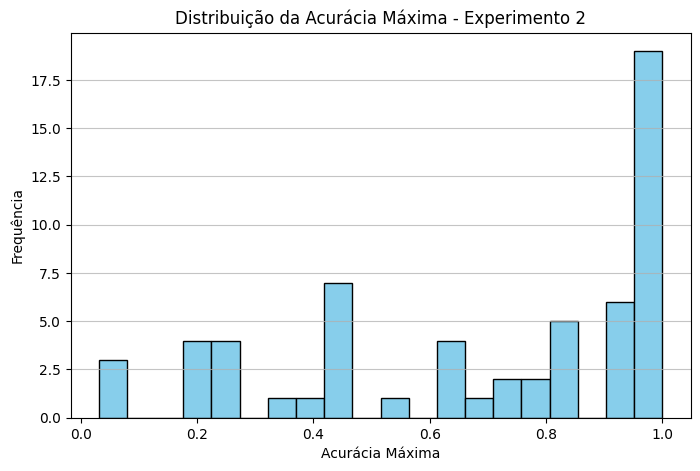

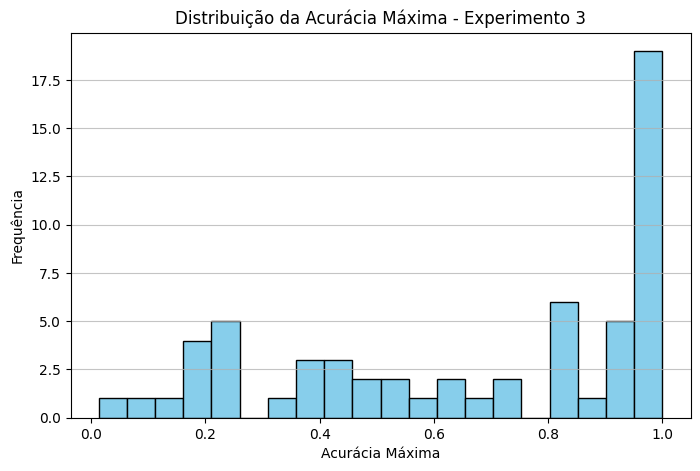

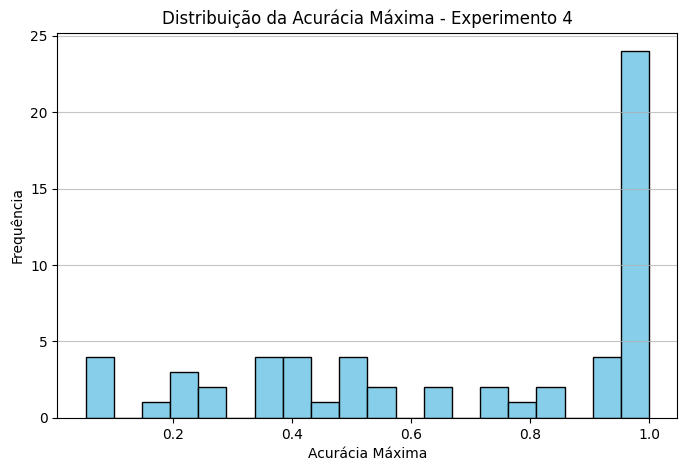

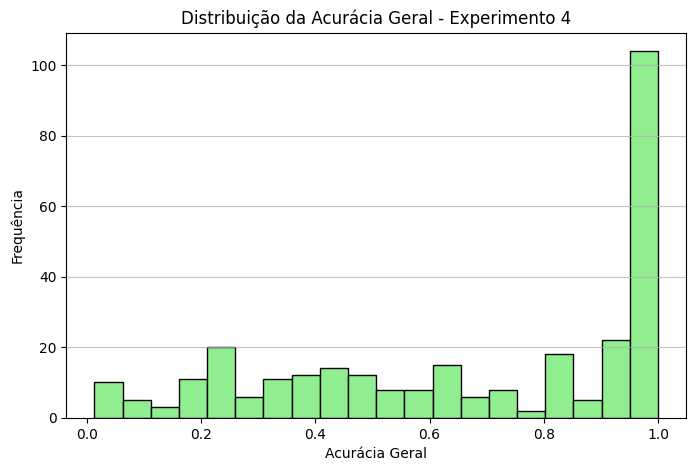

In [99]:
plot_max_accuracy_distribution(dataframes, experiment_ids)

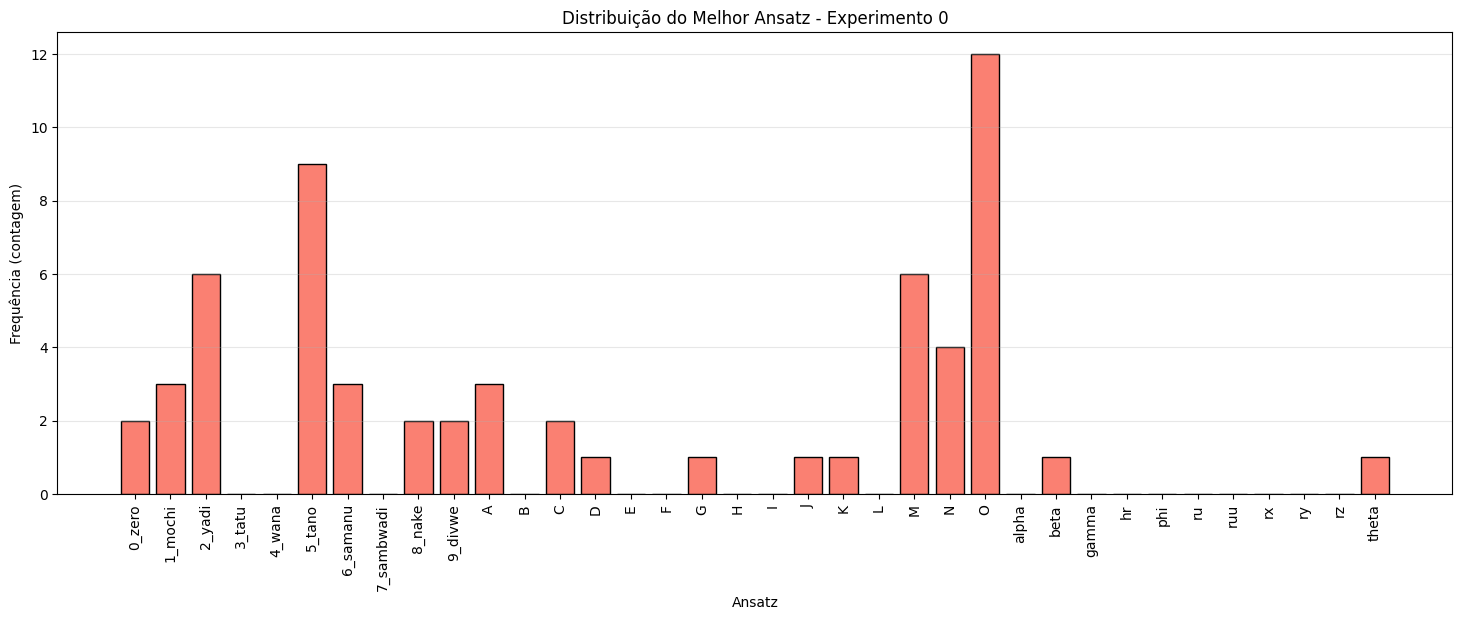

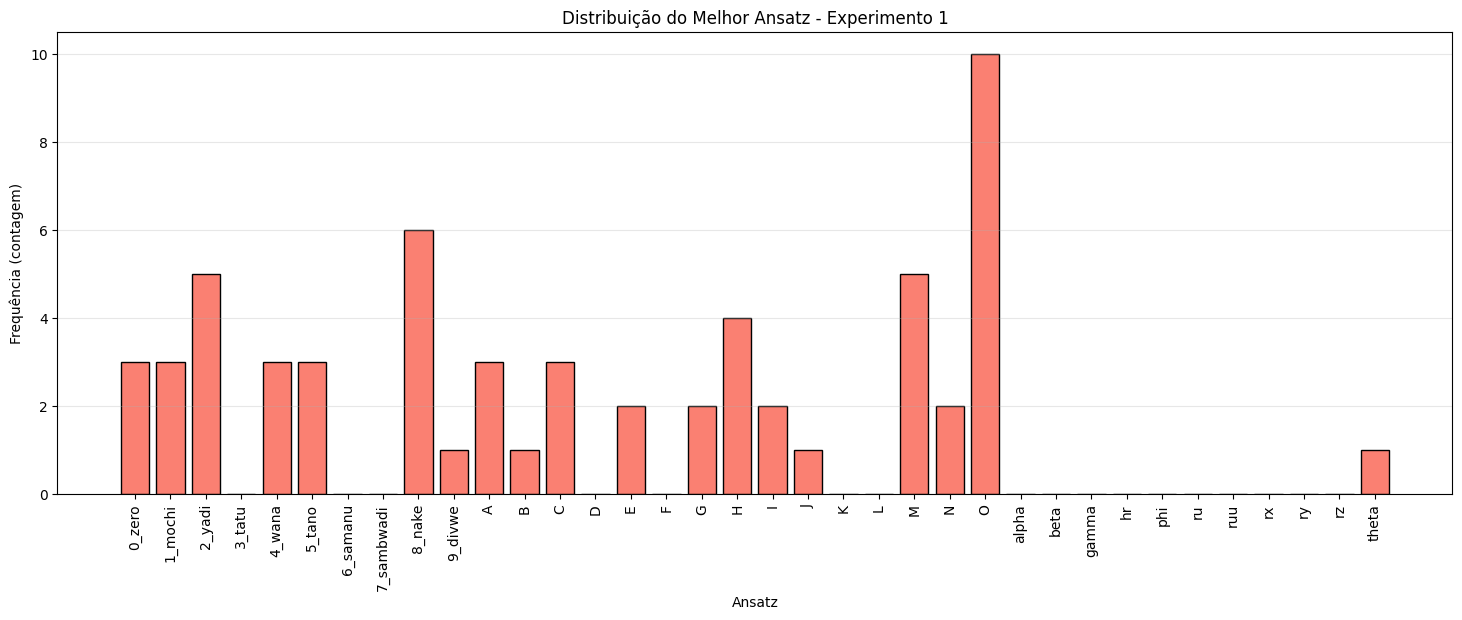

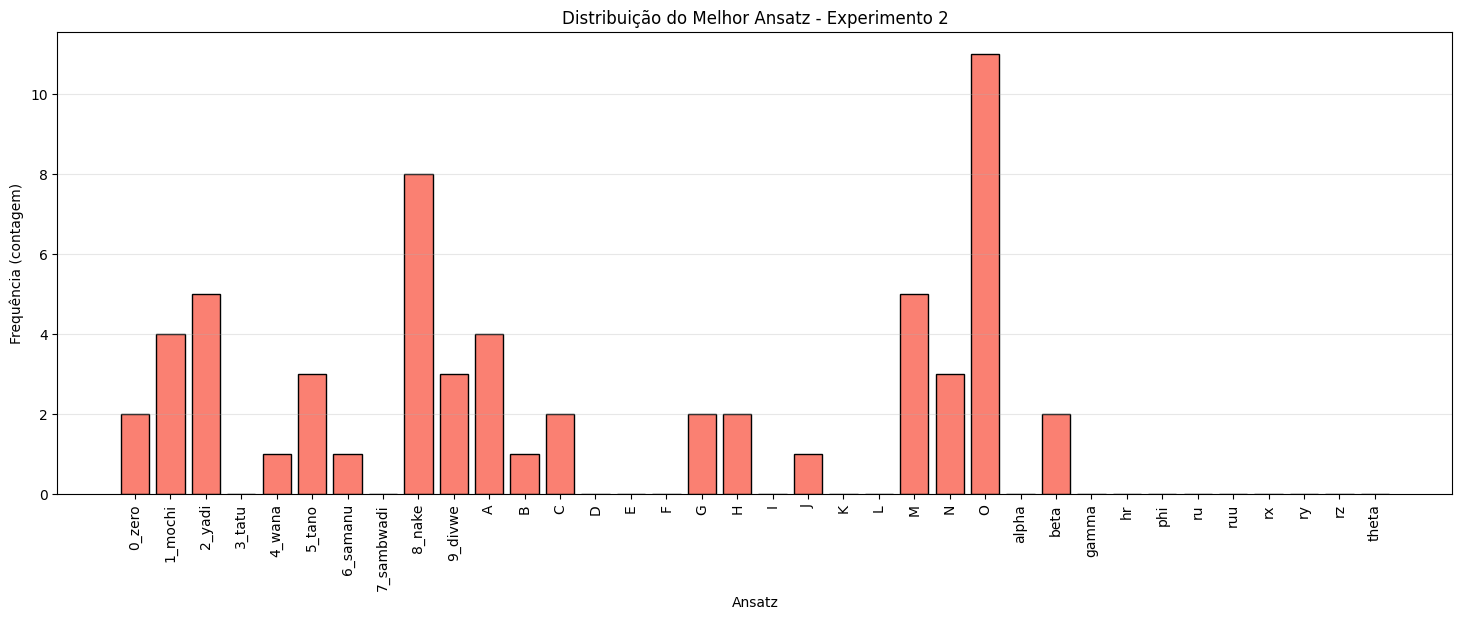

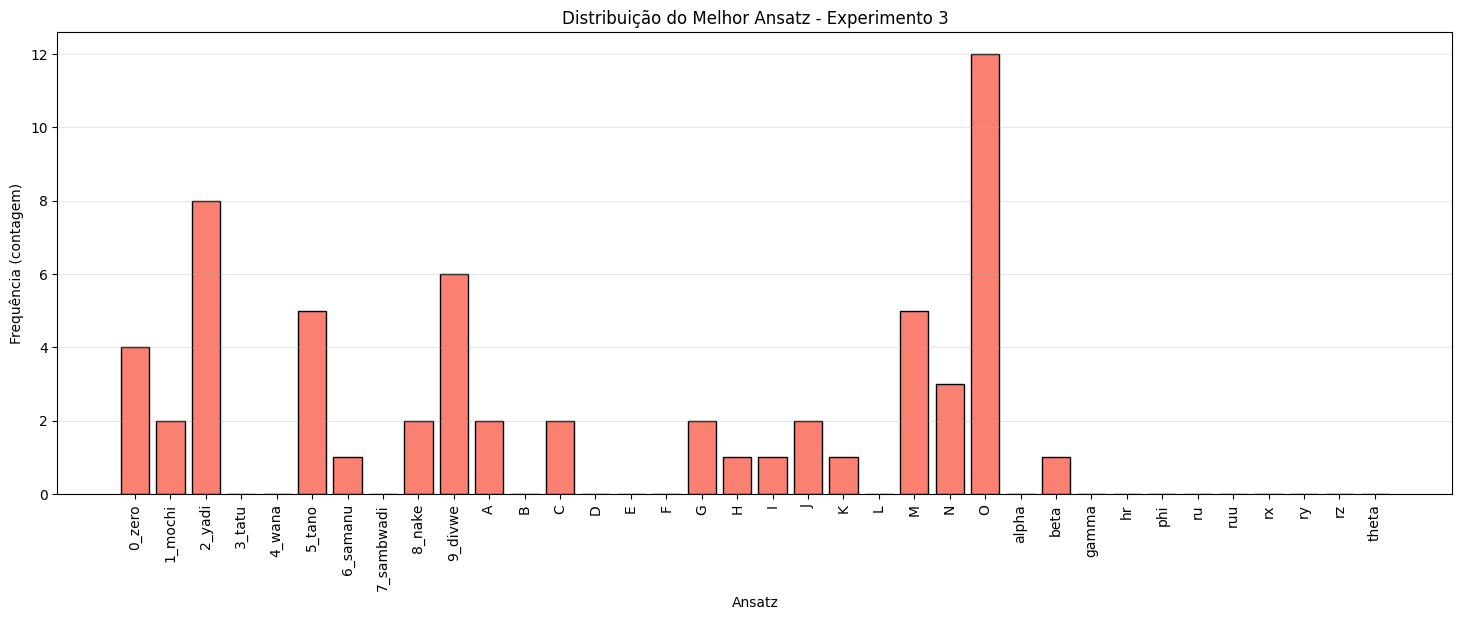

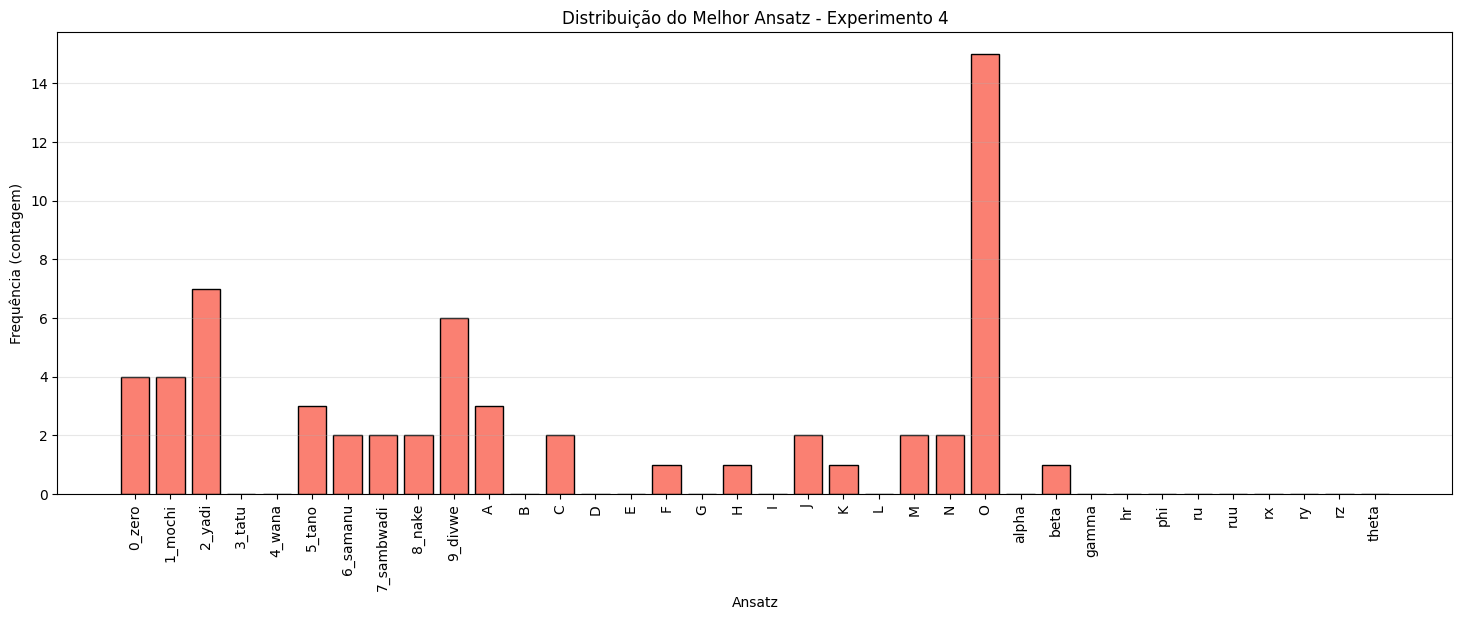

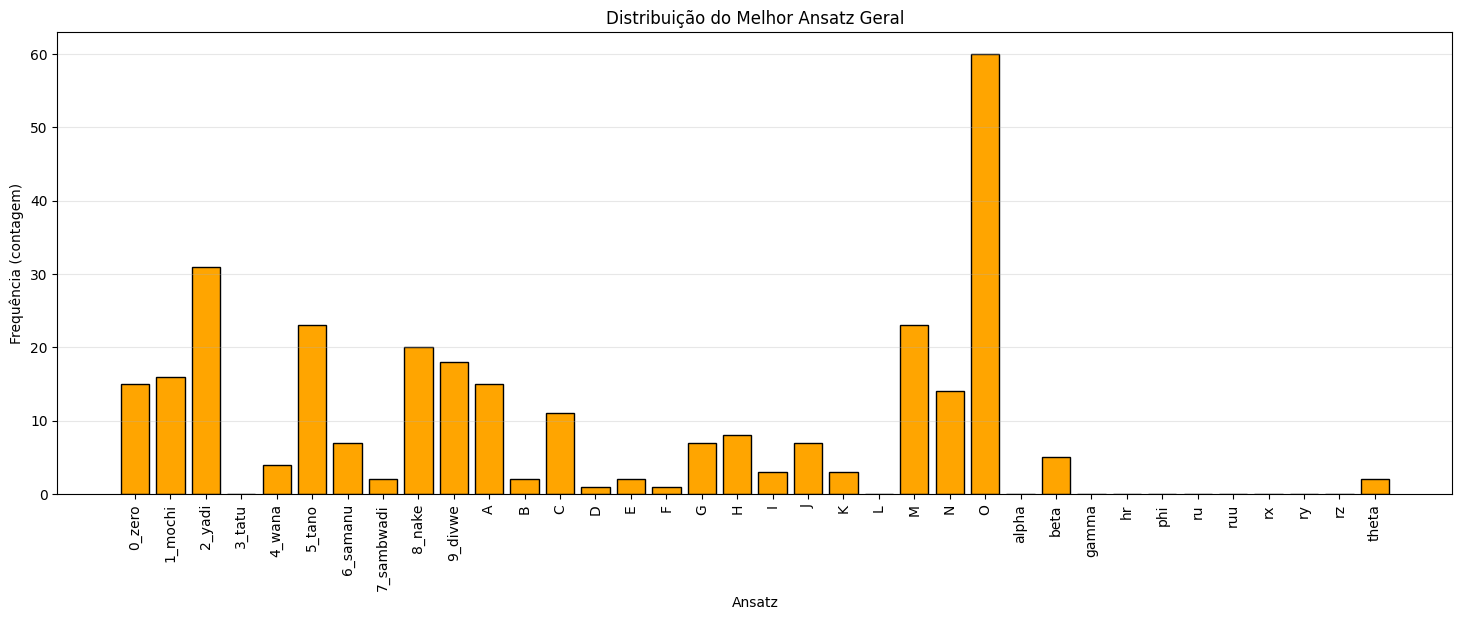

In [100]:
plot_best_ansatz_distribution(dataframes, experiment_ids, ansatz_labels)

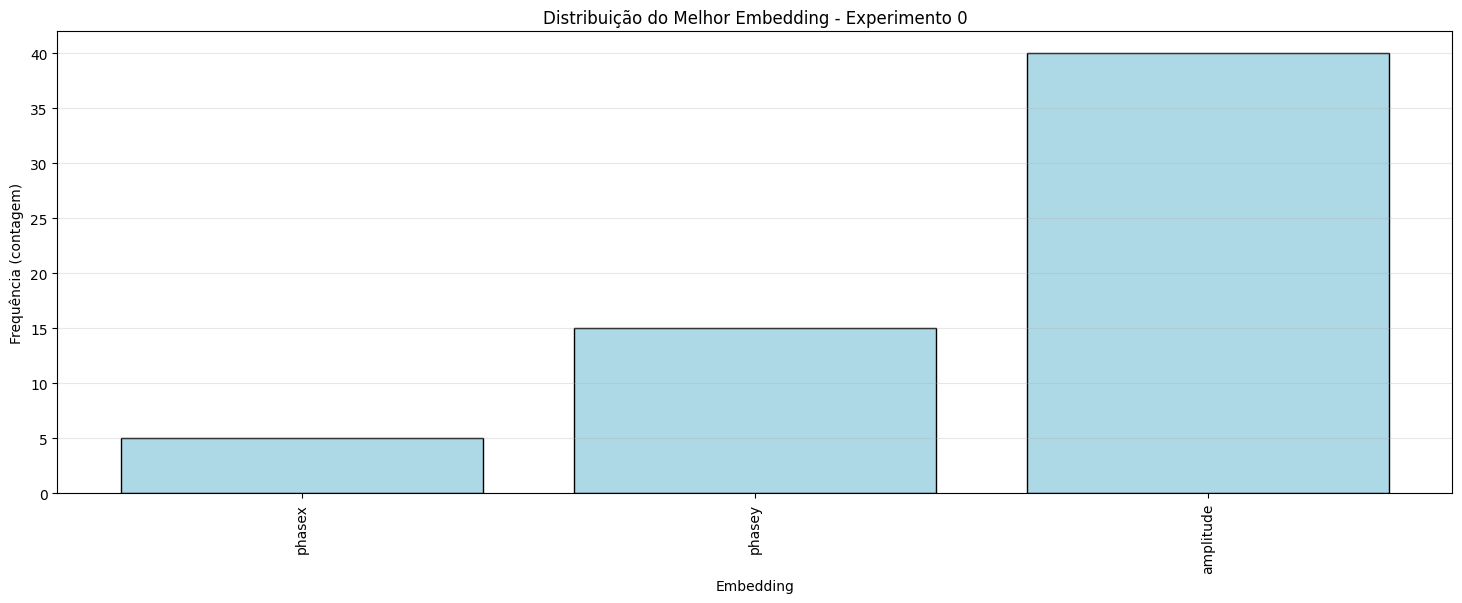

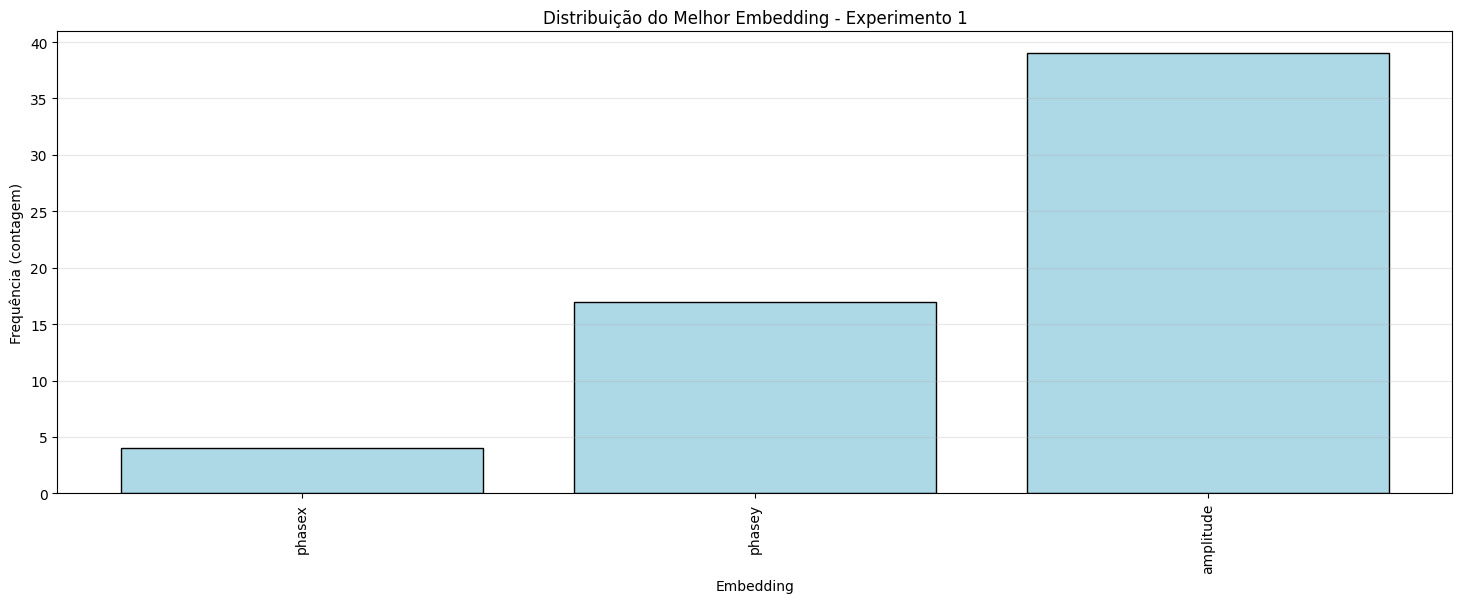

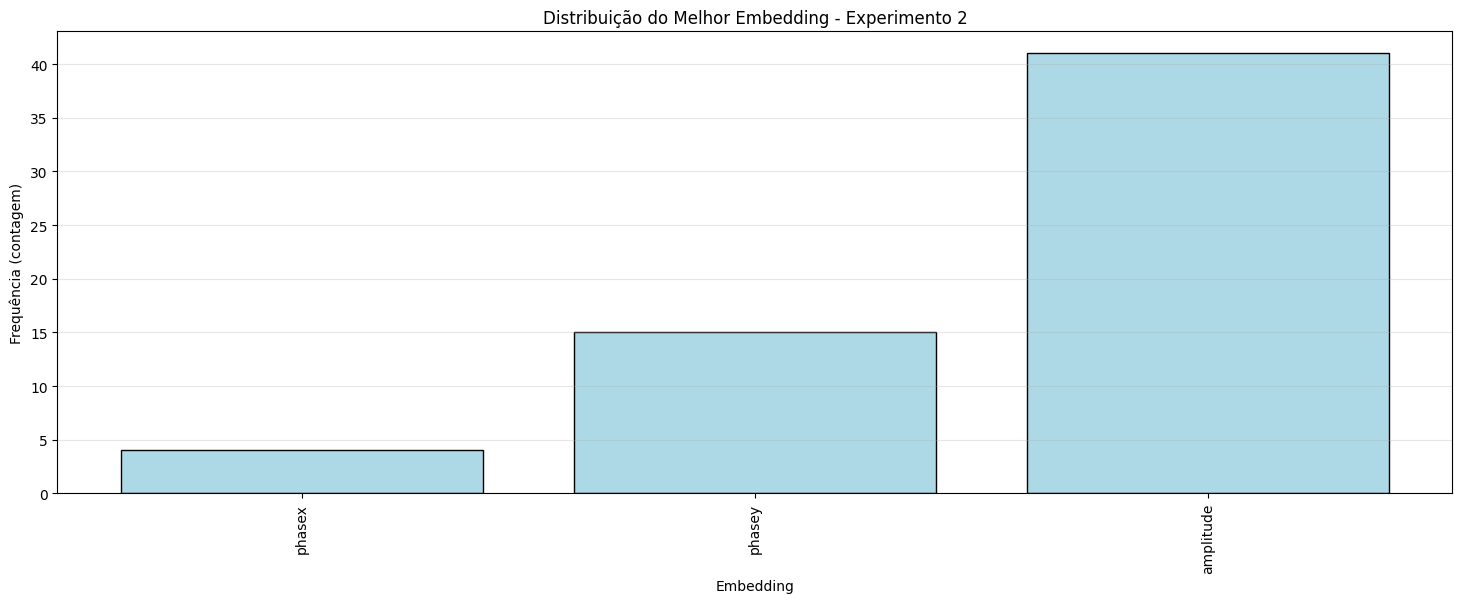

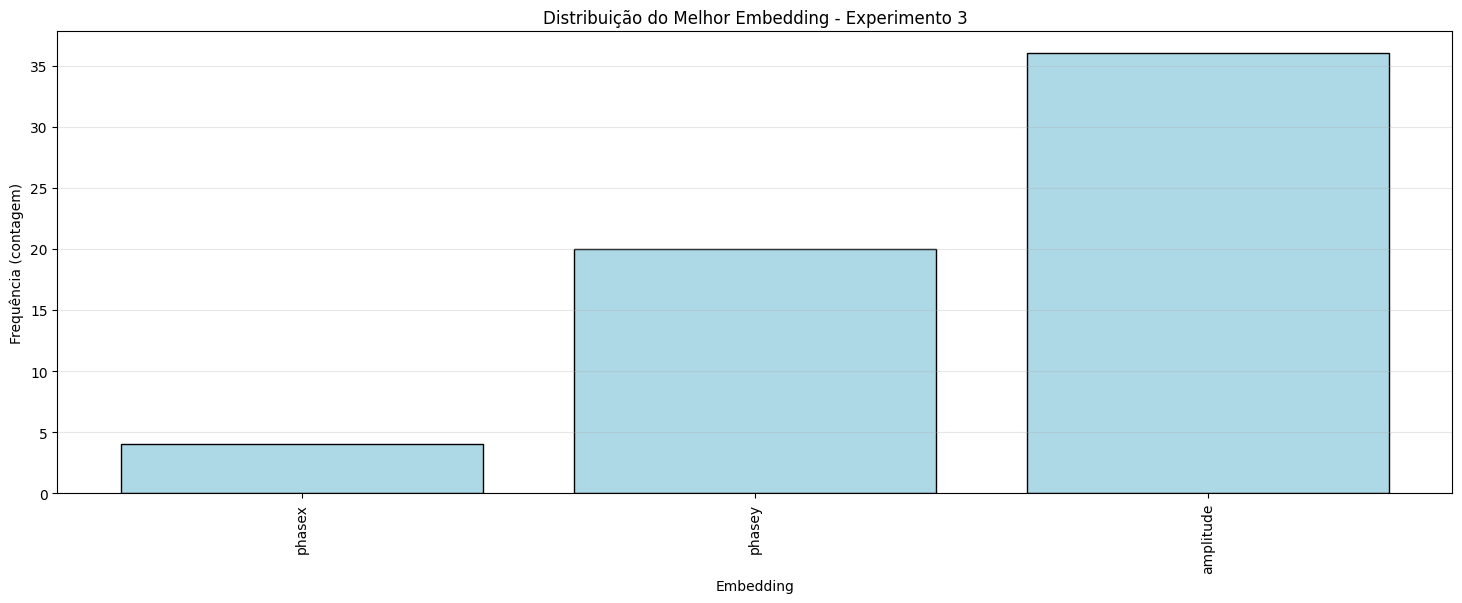

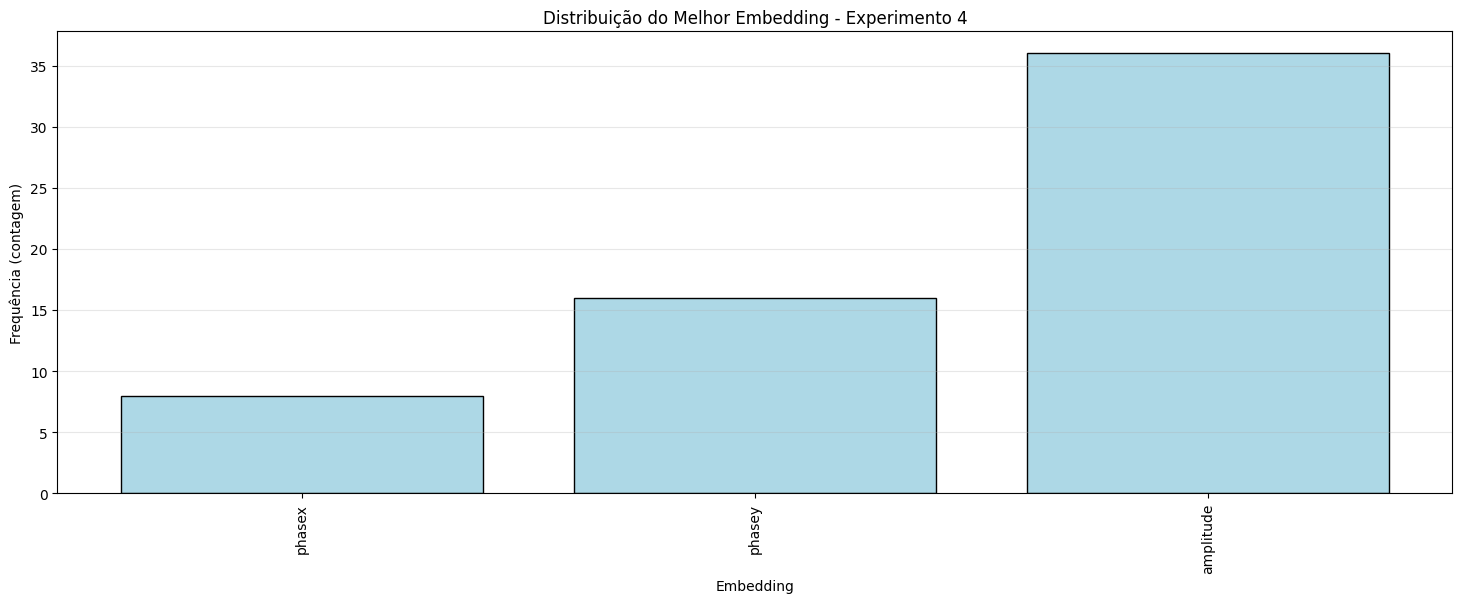

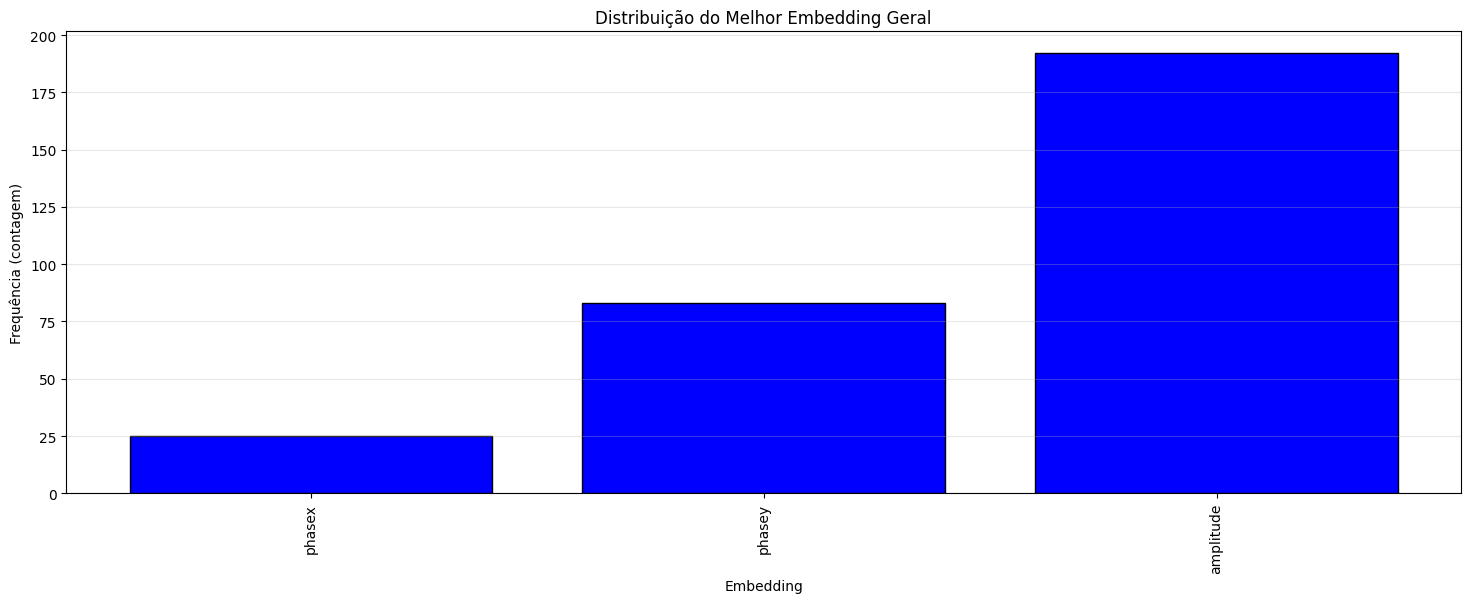

In [101]:
plot_best_embedding_distribution(dataframes, experiment_ids, embedding_labels)

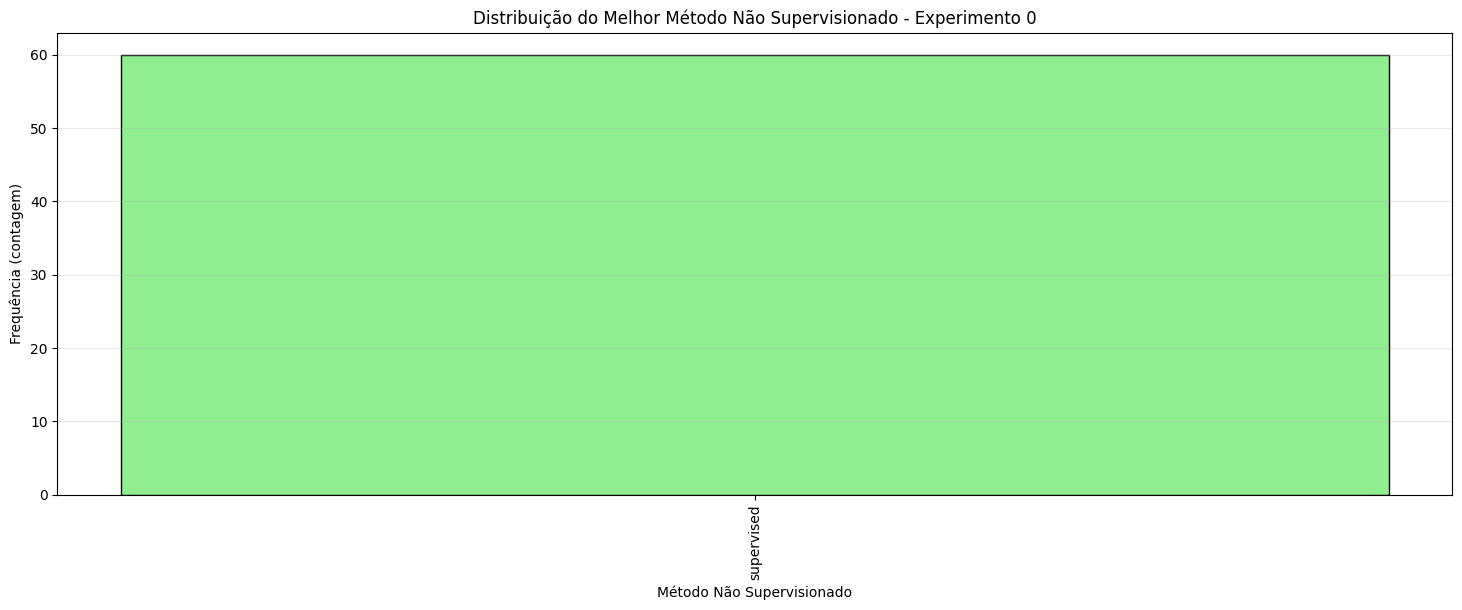

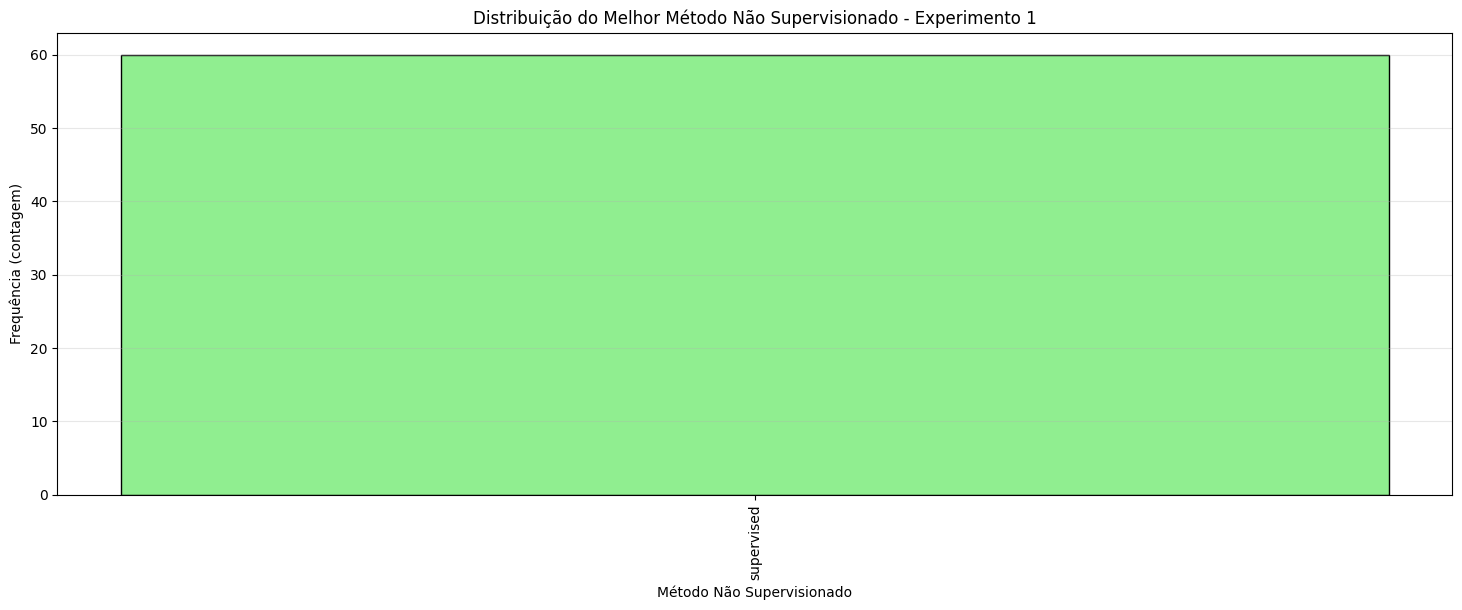

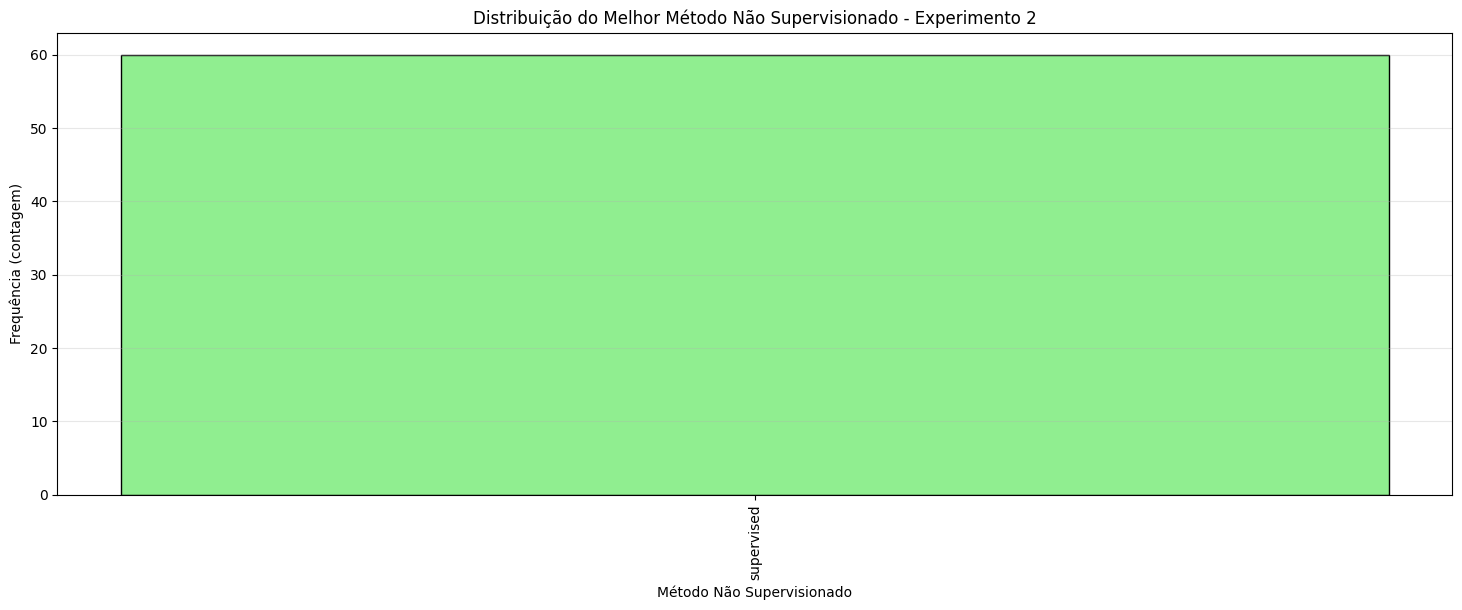

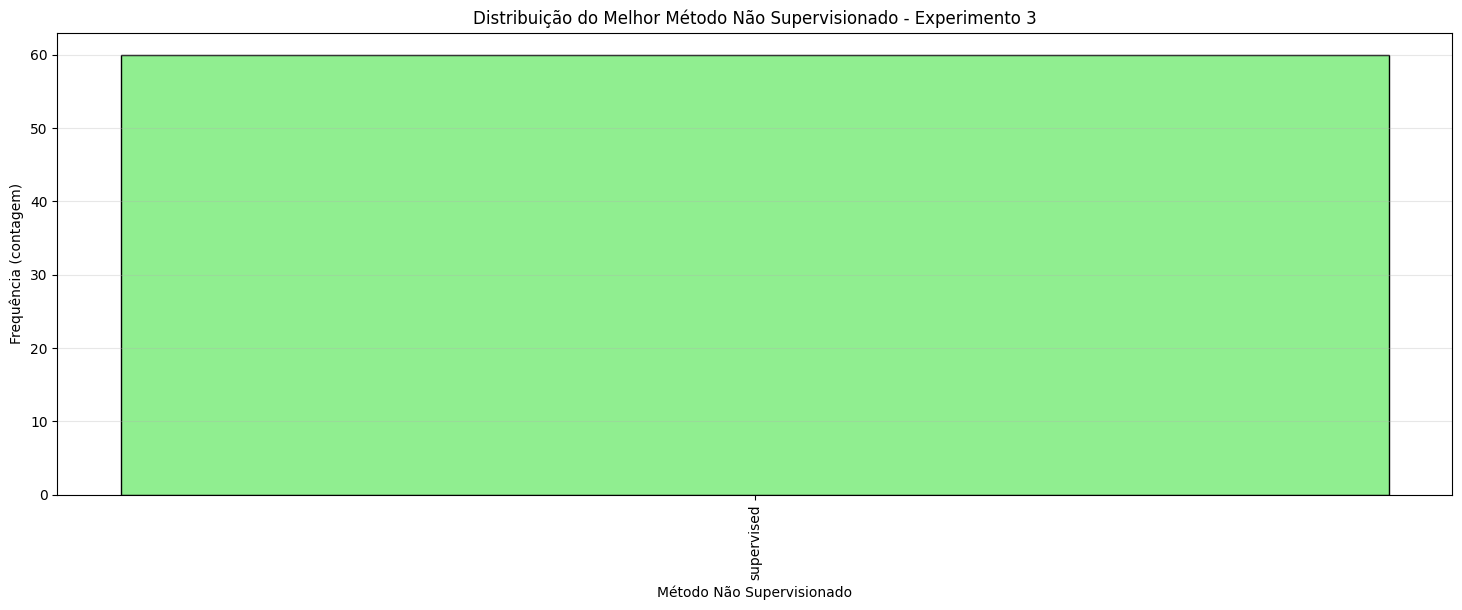

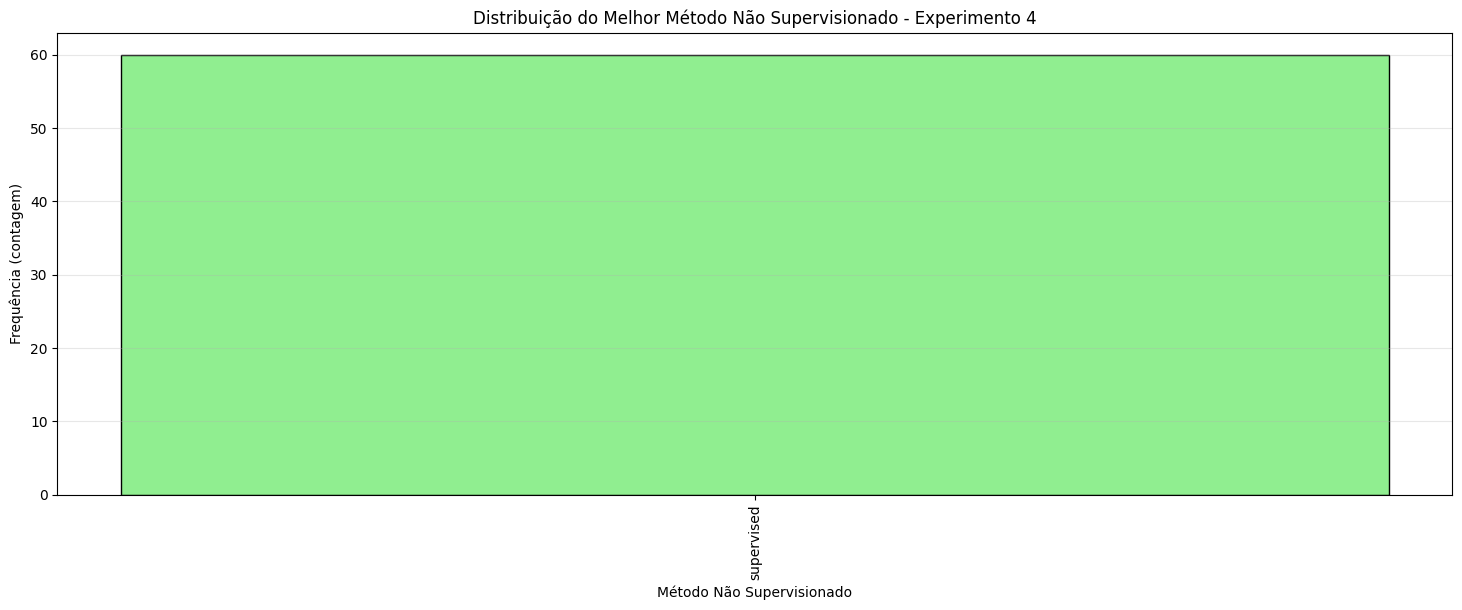

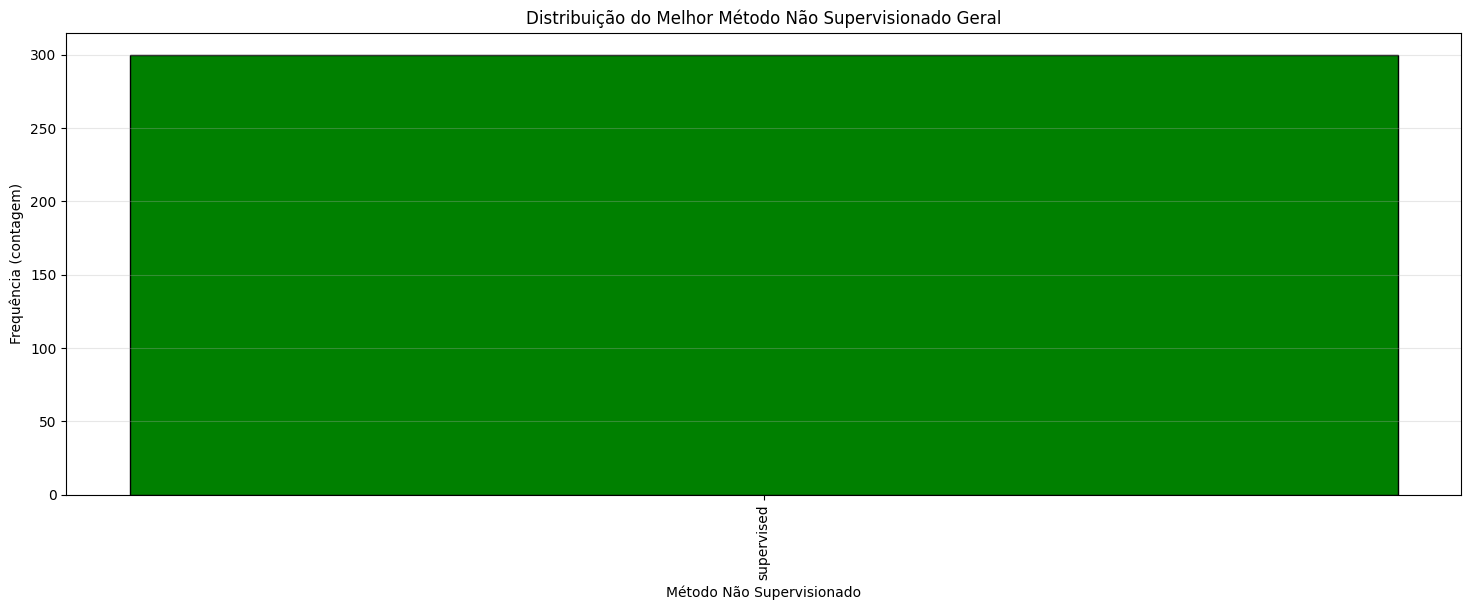

In [102]:
plot_best_unsupervised_distribution(dataframes, experiment_ids, unsup_labels)

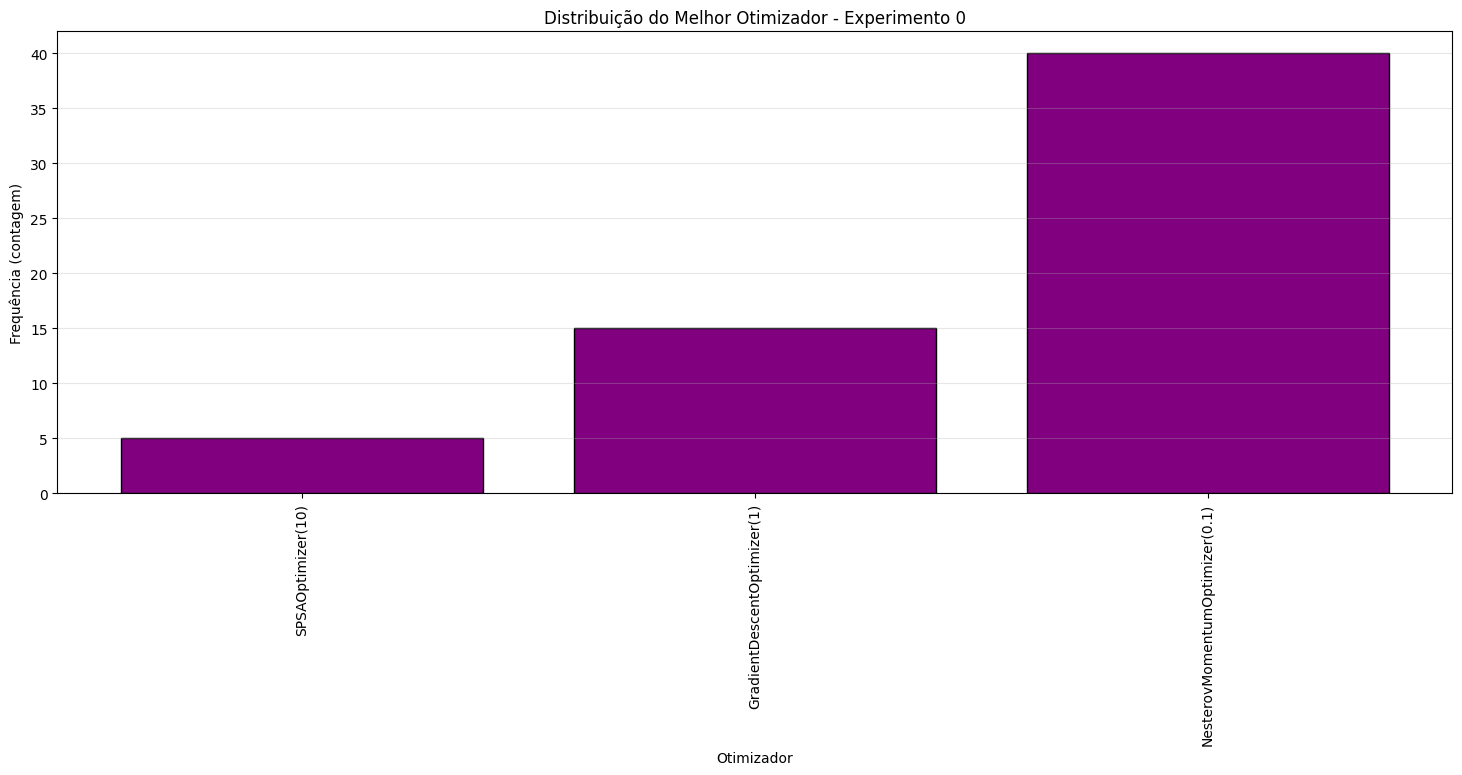

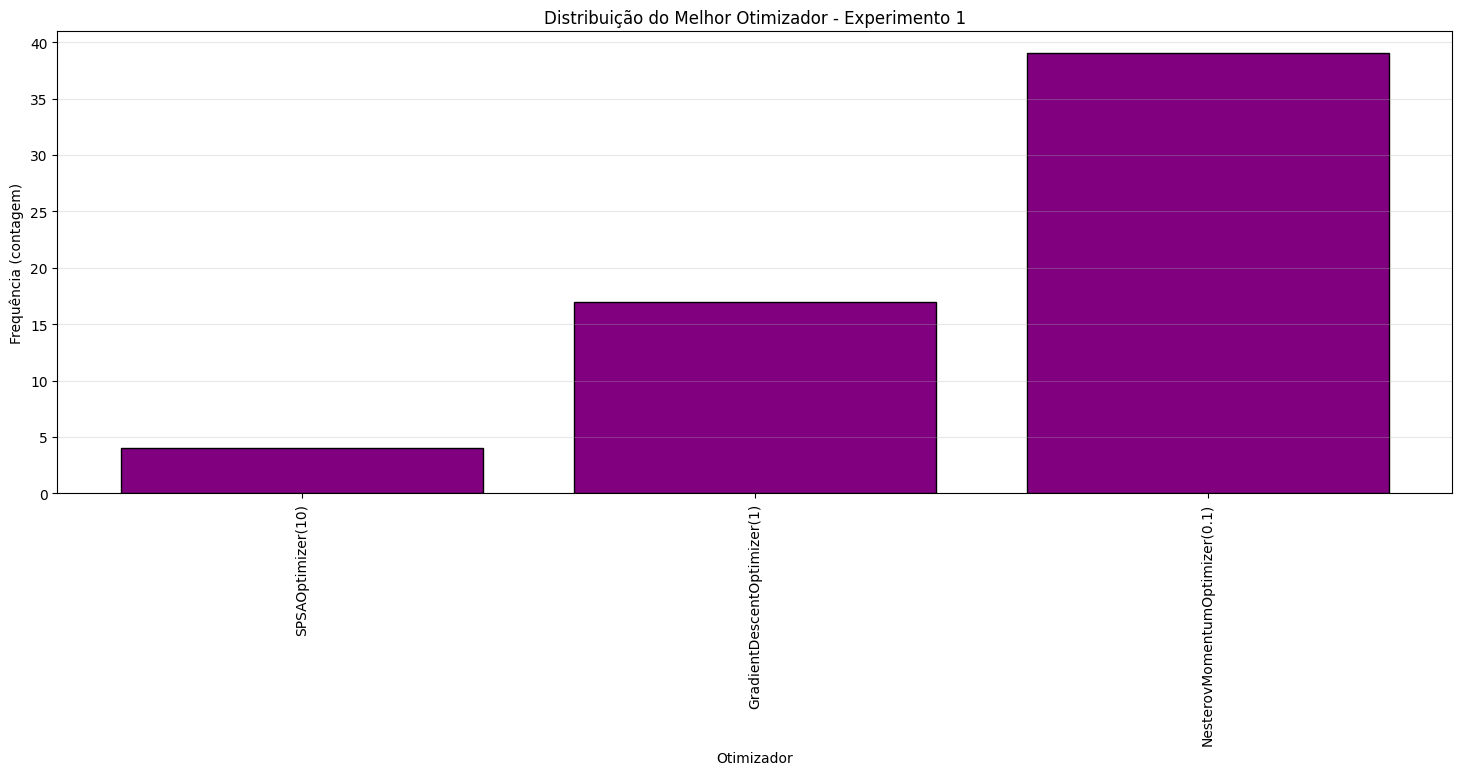

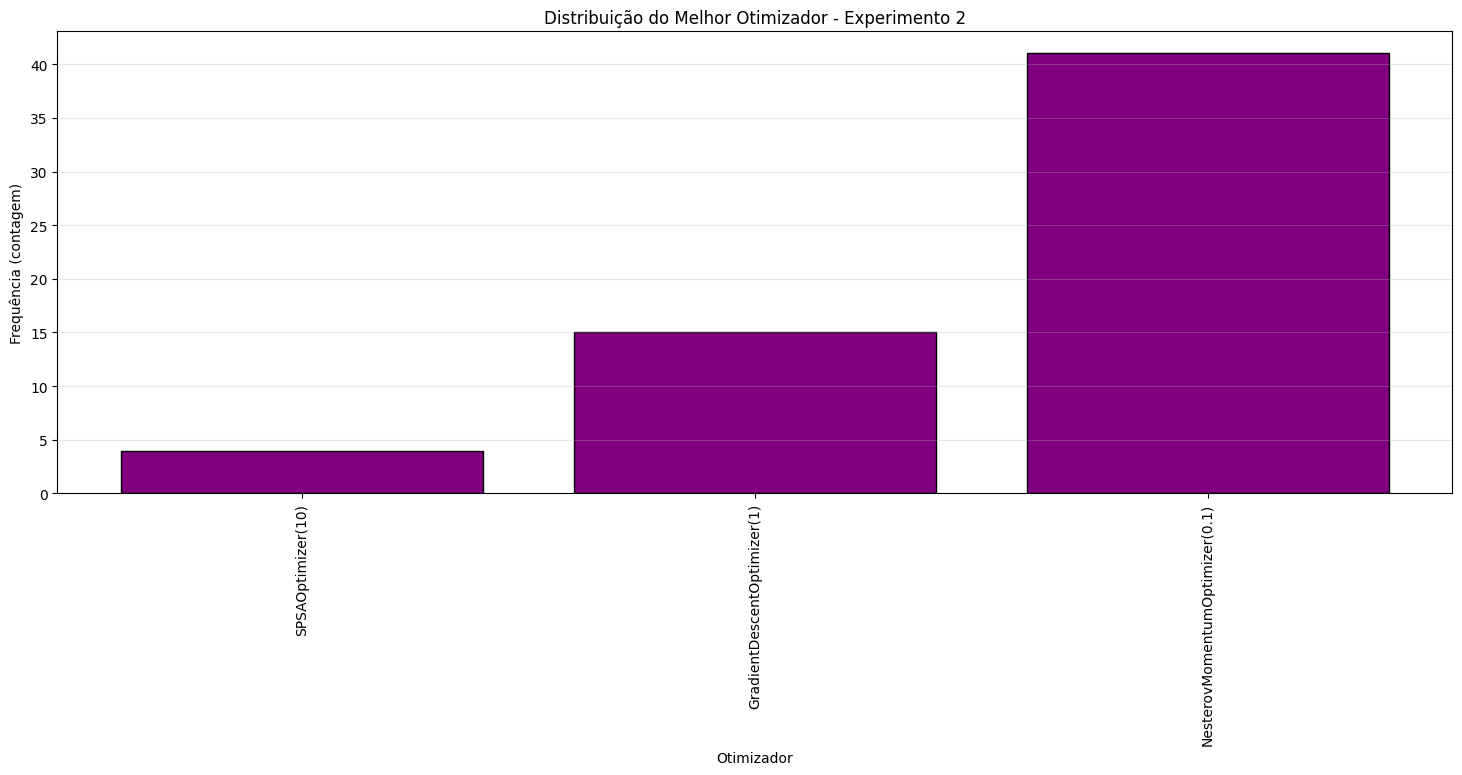

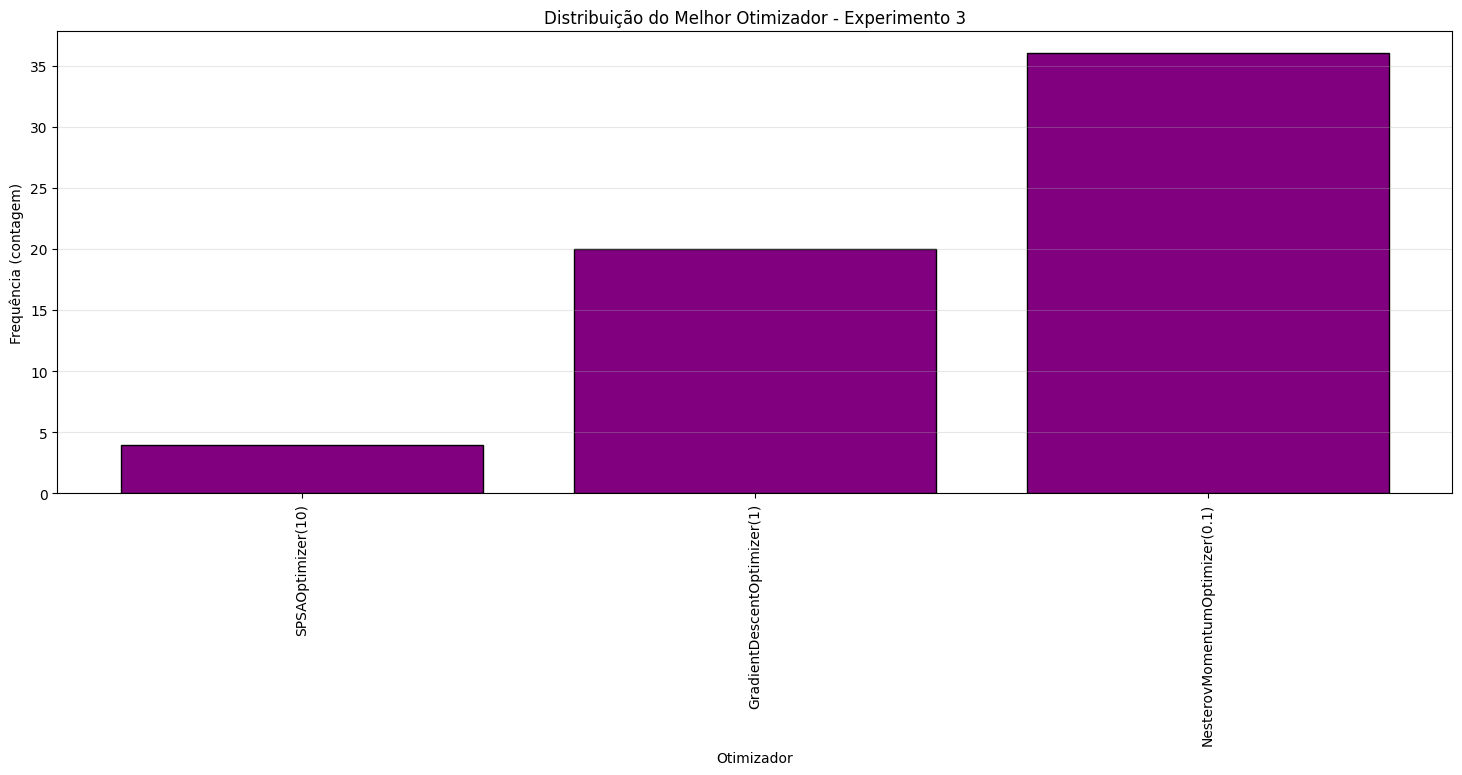

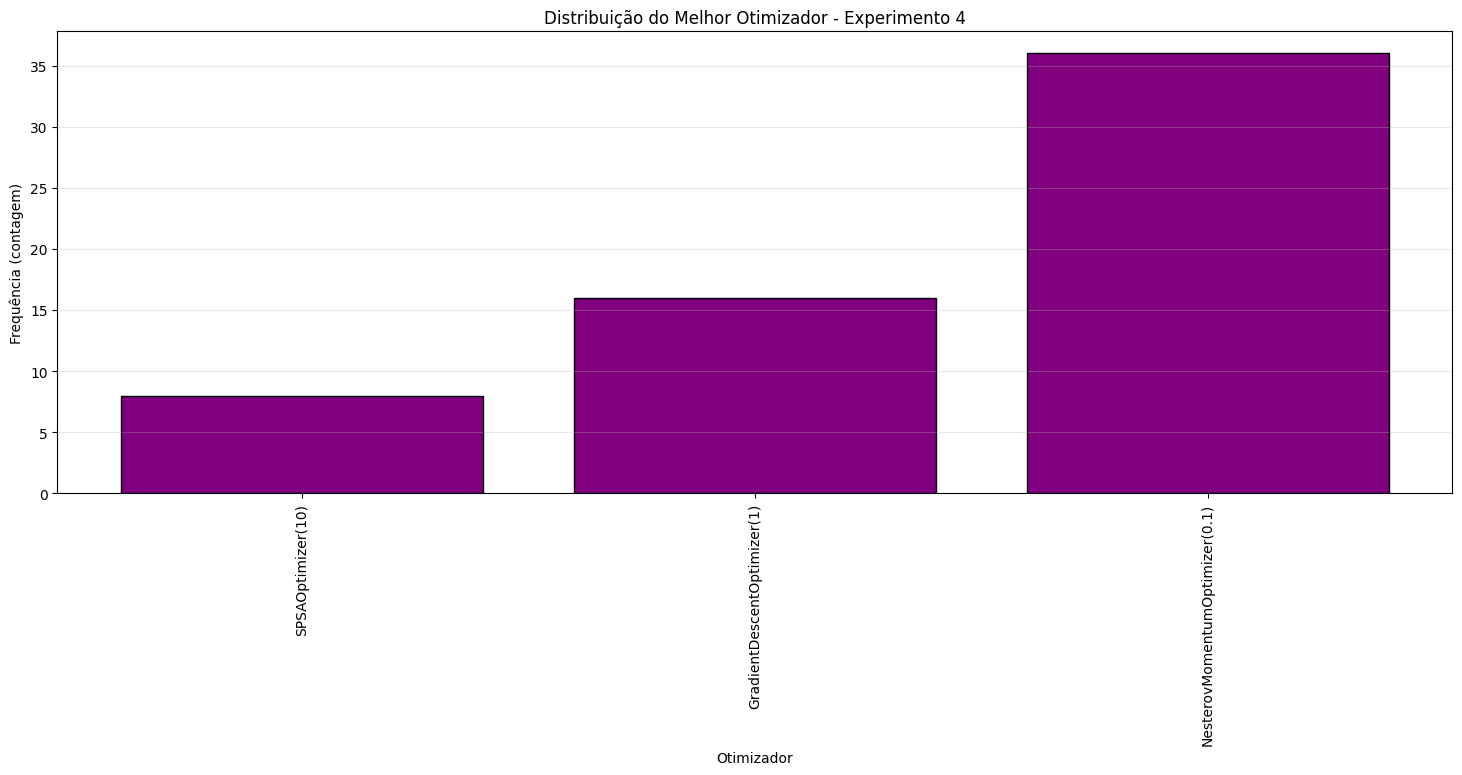

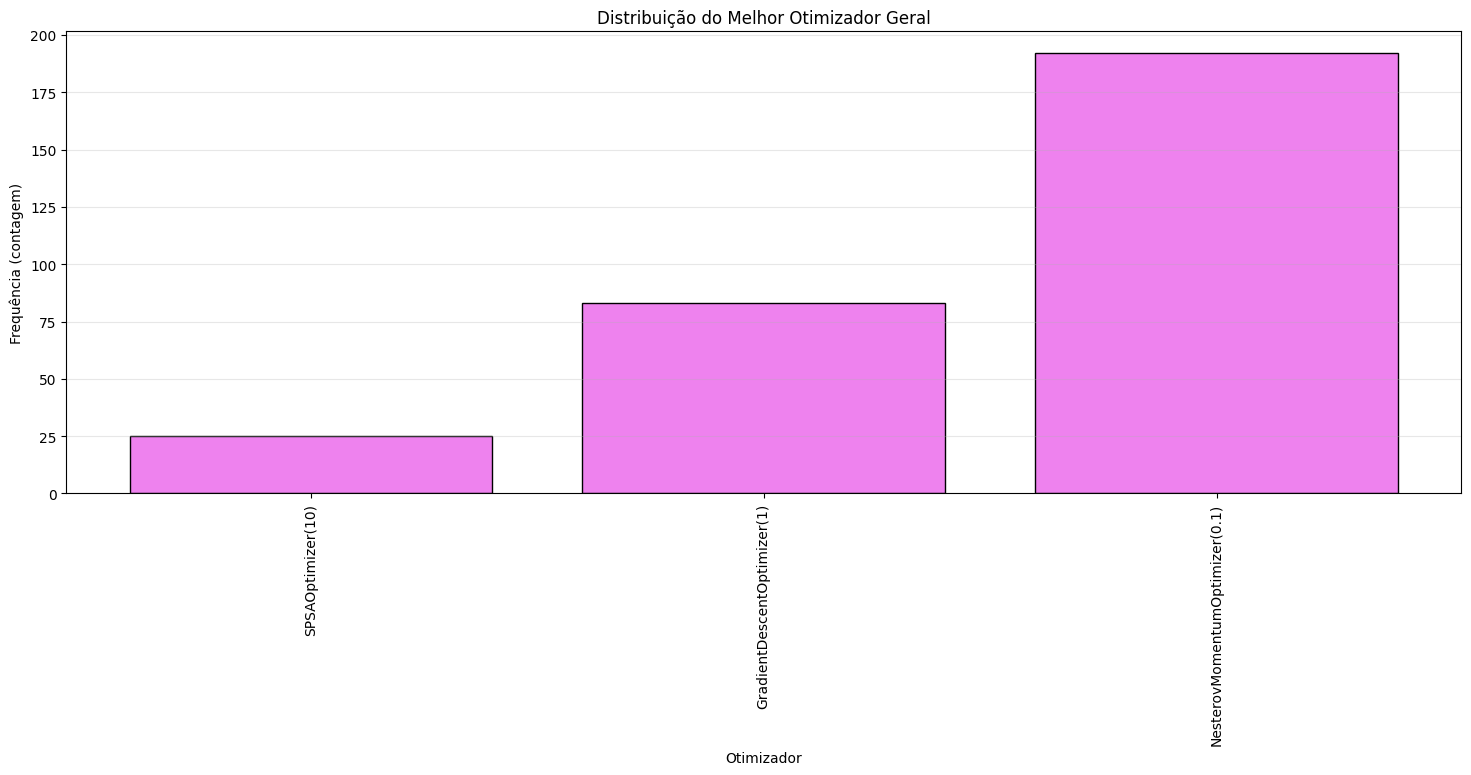

In [103]:
plot_best_optimizer_distribution(dataframes, experiment_ids, optimizer_labels)